In [1]:
import re
import pandas as pd
import emoji
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline
sns.set_theme(style="darkgrid")

In [2]:
f = open('WhatsApp Chat with Strategy 101 Community 59.txt', 'r', encoding='utf-8')
data = f.read()

In [3]:
# preprocess the data to get messages

pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
messages = re.split(pattern, data)[1:]

In [4]:
# Get usernames from messages
users = []
msg = []

for message in messages:
    reply = re.split('([\w\W]+?):\s', message)
    # print(reply)
    if reply[1:]:
        users.append(reply[1])
        msg.append("".join(reply[2:]))
    else:
        users.append('group notification')
        msg.append(reply[0])

In [5]:
dates = re.findall(pattern, data)

In [6]:
df = pd.DataFrame({'datetime':dates, 'User':users, 'Message':msg})
# convert dates type
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%y, %H:%M - ')

df.head(10)

,datetime,User,Message
0,2022-05-08 13:45:00,group notification,Messages and calls are end-to-end encrypted. N...
1,2022-02-10 18:57:00,group notification,"+91 88005 02764 created group ""Strategy 101 Co..."
2,2022-05-08 13:45:00,group notification,You joined using this group's invite link\n
3,2022-05-08 14:09:00,+91 88005 02764,Hey Guys!\n\nComment your email id to get free...
4,2022-05-08 14:20:00,group notification,+91 84489 25195 joined using this group's invi...
5,2022-05-08 14:28:00,group notification,+91 99109 73616 joined using this group's invi...
6,2022-05-08 17:39:00,group notification,+91 79737 42677 joined using this group's invi...
7,2022-05-08 18:03:00,group notification,+91 99719 82616 left\n
8,2022-05-08 23:20:00,+91 95993 73181,<Media omitted>\n
9,2022-05-08 23:20:00,+91 95993 73181,Hey Guys!\n\nStrategy 101 brings to you this 1...


In [7]:
df.shape

(123, 3)

In [8]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month_name()
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute

df.head()

,datetime,User,Message,year,month,day,hour,minute
0,2022-05-08 13:45:00,group notification,Messages and calls are end-to-end encrypted. N...,2022,May,8,13,45
1,2022-02-10 18:57:00,group notification,"+91 88005 02764 created group ""Strategy 101 Co...",2022,February,10,18,57
2,2022-05-08 13:45:00,group notification,You joined using this group's invite link\n,2022,May,8,13,45
3,2022-05-08 14:09:00,+91 88005 02764,Hey Guys!\n\nComment your email id to get free...,2022,May,8,14,9
4,2022-05-08 14:20:00,group notification,+91 84489 25195 joined using this group's invi...,2022,May,8,14,20


In [9]:
# users in the chat
user_list = df['User'].unique().tolist()


In [10]:
# Dropping Non-messages
df.drop(df[df['Message'] == '<Media omitted>\n'].index, axis = 0, inplace=True)

df.drop(df[df['User'] == 'group notification'].index, axis = 0, inplace=True)

df.drop(df[df['Message'] == 'This message was deleted\n'].index, axis = 0, inplace=True)


df.shape

(33, 8)

In [11]:
# Word count of messages
all_words = []
for message in df['Message']:
    all_words.extend(message.split())

word_count = len(all_words)
word_count

2320

In [12]:
df

,datetime,User,Message,year,month,day,hour,minute
3,2022-05-08 14:09:00,+91 88005 02764,Hey Guys!\n\nComment your email id to get free...,2022,May,8,14,9
9,2022-05-08 23:20:00,+91 95993 73181,Hey Guys!\n\nStrategy 101 brings to you this 1...,2022,May,8,23,20
17,2022-05-12 21:41:00,+91 98112 98080,"Greetings All, \n\nBudding Analyst, in collabo...",2022,May,12,21,41
25,2022-05-14 22:33:00,+91 98112 98080,"Greetings Everyone,\n\nIt’s been a long time r...",2022,May,14,22,33
30,2022-05-16 22:39:00,+91 98112 98080,"Greetings All, \n\nBudding Analyst, in collabo...",2022,May,16,22,39
37,2022-05-17 16:34:00,+91 98112 98080,🎉Attention Fellas!🎉\n\n*CUR8* brings to you th...,2022,May,17,16,34
41,2022-05-19 12:29:00,+91 96439 57054,Want to land your Dream Tech Job in just 2.5 H...,2022,May,19,12,29
45,2022-05-19 22:36:00,+91 98112 98080,"Greetings Everyone ✨\n\nToday, we bring to you...",2022,May,19,22,36
52,2022-05-20 18:56:00,+91 98112 98080,⚠️ *Big News Ahead!*\n\n*Unstop IGNITE Season ...,2022,May,20,18,56
54,2022-05-22 22:58:00,+91 85957 03445,Hey everyone! \n\n*Strategy 101* brings you an...,2022,May,22,22,58


In [13]:
# No. of emojis
emoji_list = []
for message in df['Message']:
    for char in message:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)
len(emoji_list)

126

In [14]:
# No. of links
from urlextract import URLExtract
extractor = URLExtract()

links = []
for message in df['Message']:
    links.extend(extractor.find_urls(message))

len(links)

30

<AxesSubplot:>

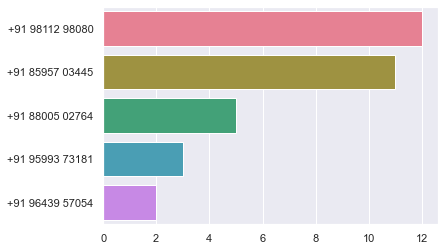

In [15]:
# Most active users in group
most_active = df['User'].value_counts().head(5)

sns.barplot(y = most_active.index, x = most_active.values, palette="husl")

In [16]:
per_active = round((df['User'].value_counts() / df.shape[0]) * 100, 2).rename('percentage active')

per_active

+91 98112 98080    36.36
+91 85957 03445    33.33
+91 88005 02764    15.15
+91 95993 73181     9.09
+91 96439 57054     6.06
Name: percentage active, dtype: float64

In [17]:
from stop_words import get_stop_words
stop_words = get_stop_words('en')

words = []

for message in df['Message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

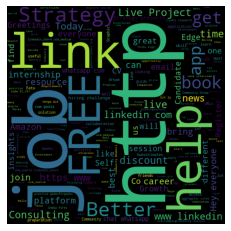

In [18]:
wc = WordCloud(stopwords = stop_words, width=500, height=500, background_color='black')
wc_gen = wc.generate(df['Message'].str.cat(sep=' '))
plt.axis('off')
plt.imshow(wc_gen);

In [19]:
from collections import Counter

most_common_df = pd.DataFrame(Counter(words).most_common(20))
pd.DataFrame(Counter(words).most_common(20)).rename(columns = {0:'words', 1:'times used'})

,words,times used
0,-,34
1,strategy,15
2,101,15
3,help,11
4,link,9
5,hey,8
6,community,8
7,live,8
8,time,8
9,consulting,8


C:\Users\rashm\anaconda3\envs\envv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


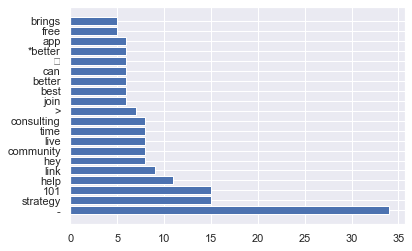

In [20]:
fig, ax = plt.subplots()
plt.style.use('seaborn-dark-palette')

ax.barh(most_common_df[0], most_common_df[1]);

In [21]:
emoji_df = pd.DataFrame(Counter(emoji_list).most_common(len(Counter(emoji_list)))).rename(columns = {0:'emoji', 1:'count'})

In [22]:
emoji_df['percentage'] = round(emoji_df['count'] / emoji_df['count'].sum() * 100, 2)

emoji_df

,emoji,count,percentage
0,👥,16,12.70
1,👉,13,10.32
2,📎,10,7.94
3,✨,6,4.76
4,🔴,6,4.76
5,📙,6,4.76
6,💯,5,3.97
7,👇,5,3.97
8,🏻,5,3.97
9,✔,5,3.97


In [23]:
df['month_num'] = df['datetime'].dt.month

In [24]:
timeline = df.groupby(['year', 'month_num', 'month']).count()['Message'].reset_index()

timeline

,year,month_num,month,Message
0,2022,5,May,14
1,2022,6,June,7
2,2022,7,July,12


In [25]:
time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+'-'+str(timeline['year'][i]))

In [26]:
timeline['time'] = time
timeline

,year,month_num,month,Message,time
0,2022,5,May,14,May-2022
1,2022,6,June,7,June-2022
2,2022,7,July,12,July-2022


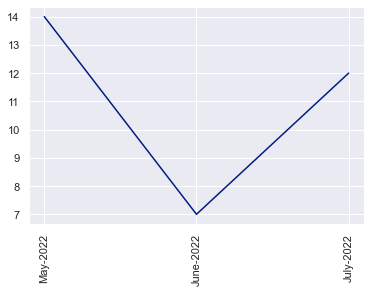

In [27]:
# Monthly timeline
plt.plot(timeline['time'], timeline['Message'])
plt.xticks(rotation = 'vertical');

In [28]:
df['day_name'] = df['datetime'].dt.day_name()

In [29]:
df['day_name'].value_counts()

Thursday     10
Sunday        5
Saturday      4
Monday        4
Wednesday     4
Tuesday       3
Friday        3
Name: day_name, dtype: int64

In [30]:
period = []
for hour in df['hour']:
    if hour == 23:
        period.append(str(hour) + '-' + str('00'))
    else:
        period.append(str(hour) + '-' + str(hour+1))

In [31]:
df['period'] = period

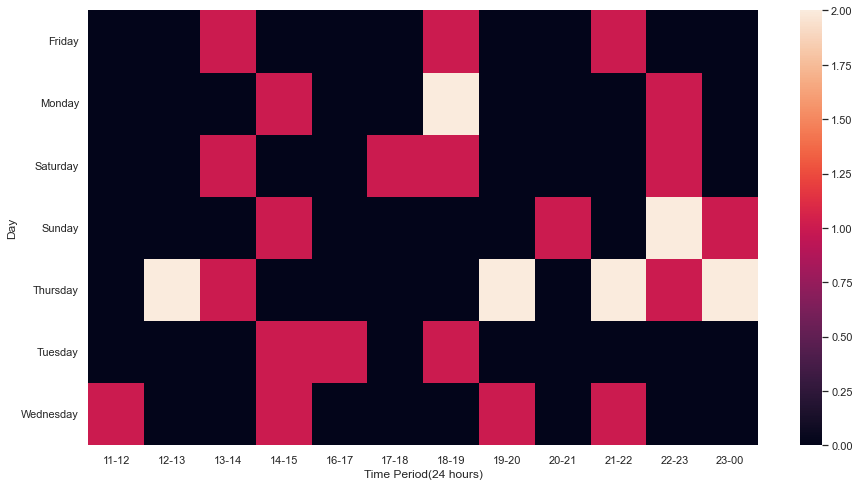

In [32]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.pivot_table(index='day_name', columns = 'period', values = 'Message', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.xlabel('Time Period(24 hours)')
plt.ylabel('Day')
plt.show()

In [33]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiments=SentimentIntensityAnalyzer()
df["positive"]=[sentiments.polarity_scores(i)["pos"] for i in df["Message"]]
df["negative"]=[sentiments.polarity_scores(i)["neg"] for i in df["Message"]]
df["neutral"]=[sentiments.polarity_scores(i)["neu"] for i in df["Message"]]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rashm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [34]:
def sentiment(d):
    if d["positive"] >= d["negative"] and d["positive"] >= d["neutral"]:
        return 1
    if d["negative"] >= d["positive"] and d["negative"] >= d["neutral"]:
        return -1
    if d["neutral"] >= d["positive"] and d["neutral"] >= d["negative"]:
        return 0

df['sentiment'] = df.apply(lambda row: sentiment(row), axis=1)
df.head()

,datetime,User,Message,year,month,day,hour,minute,month_num,day_name,period,positive,negative,neutral,sentiment
3,2022-05-08 14:09:00,+91 88005 02764,Hey Guys!\n\nComment your email id to get free...,2022,May,8,14,9,5,Sunday,14-15,0.264,0.000,0.736,0
9,2022-05-08 23:20:00,+91 95993 73181,Hey Guys!\n\nStrategy 101 brings to you this 1...,2022,May,8,23,20,5,Sunday,23-00,0.417,0.000,0.583,0
17,2022-05-12 21:41:00,+91 98112 98080,"Greetings All, \n\nBudding Analyst, in collabo...",2022,May,12,21,41,5,Thursday,21-22,0.080,0.000,0.920,0
25,2022-05-14 22:33:00,+91 98112 98080,"Greetings Everyone,\n\nIt’s been a long time r...",2022,May,14,22,33,5,Saturday,22-23,0.191,0.074,0.736,0
30,2022-05-16 22:39:00,+91 98112 98080,"Greetings All, \n\nBudding Analyst, in collabo...",2022,May,16,22,39,5,Monday,22-23,0.144,0.000,0.856,0


In [35]:
def create_wordcloud(df,k):
    # Dimensions of wordcloud
    wc = WordCloud(stopwords = stop_words, width=500,height=500,min_font_size=10,background_color='white')

    df['Message_value'] = df['Message'][(df['sentiment'] == 1).index]

    # Word cloud generated
    df_wc = wc.generate(df['Message_value'].str.cat(sep=" "))
    return df_wc

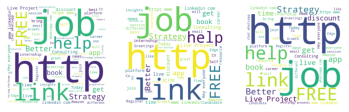

In [36]:
# Wordcloud

fig, axs = plt.subplots(1,3)

axs[0].imshow(create_wordcloud(df,1))
axs[0].axis('off')
axs[0].set_xlabel('positive')

axs[1].imshow(create_wordcloud(df,0))
axs[1].set_xlabel('neutral')
axs[1].axis('off')

axs[2].imshow(create_wordcloud(df,-1))
axs[2].set_xlabel('negative')
axs[2].axis('off')

plt.show()

In [37]:
# Most Positive Users
df['User'][(df['sentiment'] == 1).index].value_counts().head(10)

+91 98112 98080    12
+91 85957 03445    11
+91 88005 02764     5
+91 95993 73181     3
+91 96439 57054     2
Name: User, dtype: int64